In [127]:
import urllib.request
import json
import re
import numpy as np
import pandas as pd
import networkx as nx
import nltk
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from matplotlib import pyplot as plt
import requests
import scipy.stats
import os
from fa2 import ForceAtlas2
from nltk.tokenize import WordPunctTokenizer

%matplotlib inline  

In [4]:
baseurl = "https://aesthetics.fandom.com/api.php?"
action = "action=query"
title = "List_of_Aesthetics"
content = "prop=revisions&rvprop=content&rvslots=*" 
dataformat = "format=json" 

query = baseurl+action+"&"+content+"&titles="+title+"&"+dataformat
print(query)
    
response = urllib.request.urlopen(query)
data = response.read()
cont = data.decode('utf-8')

jsontext = json.loads(cont)

https://aesthetics.fandom.com/api.php?action=query&prop=revisions&rvprop=content&rvslots=*&titles=List_of_Aesthetics&format=json


In [5]:
en_pag=re.findall(r'\d+',str(jsontext['query']['pages'].keys()))

txt_new=jsontext['query']['pages'][str(en_pag[0])]['revisions'][0]['slots']['main']['*']

In [6]:
txt_new

'<div style="text-align:center;"><div style="font-size:160%; line-height:130%;"></div></div>\n\nIf you need assistance with identifying your aesthetic or creating a moodboard, feel free to ask questions in the discussion page, official Aesthetics Wiki Discord server or on the official [https://www.reddit.com/r/aestheticswiki/ Aesthetics Wiki Subreddit]. Also, feel free to check out the [https://www.are.na/museum-of-aesthetics/aesthetics-superchannel Aesthetic Superchannel]! \n\n=== Help pages ===\nPlease read these pages before asking about your aesthetic: \n\n*[[FAQ]]\n*[[Helping You Find Your Aesthetic]]\n\n<br />\n\n== [[Pages We Need]] ==\nThis is a wishlist for pages that are missing from this wiki. Please start on it and then erase if off the list when you have at least 100 words written. \n\n<br />\n==Aesthetics 101: An explanation into aesthetic culture==\nThe pages made for this section will help you to gain an understanding of the various elements that come together to create

In [7]:
pattern="(?:\[\[(.*?)\]\])"

alph_txt=re.split('(?:\=\=A\=\=)', txt_new)

In [8]:
alph_list=re.findall(pattern, alph_txt[1])

In [9]:
alph_list

['Abstract',
 'Abstract Tech',
 'Acid Pixie',
 'Acidwave',
 'Adventurecore',
 'Afrofuturism',
 'Afro-Victorian',
 'After Hours',
 'Agrogirl/Agroboy|Agropeople',
 'Alien',
 'Alternative',
 'Americana',
 'American Pioneers',
 'American Revolution',
 'Androgynous',
 'Anemoiacore',
 'Angelcore',
 'Anglocore',
 'Anglo Gothic',
 'Angura Kei',
 'Animecore',
 'Anti-Fashion',
 'Applecore',
 'Art Academia',
 'Arts and Crafts Movement|Arts and Crafts',
 'Art Deco',
 'Art Hoe',
 'Art Nouveau',
 'Artistiekelingen',
 'Athlete',
 'Atompunk',
 'Auroracore',
 'Autumn',
 'Avant-garde',
 'Babycore',
 'Babygirl',
 'Barbiecore',
 'Bardcore',
 'Baddie',
 'Ballet Academia',
 'Baroque',
 'Bastardcore',
 'Beatnik',
 'Bibliopunk',
 'Biker',
 'Bills',
 'Bimbo Casual',
 'Biopunk',
 'Bizarro Fiction',
 'Blob Web',
 'Bookstore Girl',
 'Bloomcore',
 'Bodikon',
 'Bogan',
 'Bohemian',
 'Bombacore',
 'Bosozoku',
 'Boujee',
 'Breakcore',
 'Brocore',
 'Bronzepunk',
 'Britpop',
 'Bubble Goth',
 'Bubblegum Bitch',
 'Bubble

In [126]:
with open('aesthetics.txt', 'w',encoding="utf-8") as f:
        f.write(txt_new)

In [10]:
print("|" in "Agrogirl/Agroboy|Agropeople")

True


In [11]:
DG = nx.DiGraph()

for i in alph_list:
    if "|" in i:
        spl=re.split('(?:\|)', i)
        alph_list[alph_list.index(i)]=spl[1]
        DG.add_node(spl[1])    
    else:
        DG.add_node(i)

In [12]:
len(alph_list)

549

In [13]:
#len(DG.nodes())if file == "Arts and Crafts":
#         file='Arts and Crafts Movement'

In [14]:
mapping = {'Neo - Romanism':'Neo-Romanism', 'Robotics Kid':'Robotics Kids', 'Sad people':'Sadpeople', 
           'Arts and Crafts':'Arts and Crafts Movement','Junkpunk':'Salvagepunk','Natural Philosophy':'Green_Academia',
          'Spy fiction':'Spy_Fiction','Shā mǎ tè':'Shamate','Woodland Goth':'Woodland_goth','Ms Paint':'MS Paint'}
DG = nx.relabel_nodes(DG, mapping)

In [15]:
pd.DataFrame(list(DG.nodes())).to_csv('aesthetics.csv')

In [17]:
for char in DG:
    address = 'https://aesthetics.fandom.com/api.php?'
    action="action=query"
    titles=f"titles={char}"
#     content="prop=extracts&exlimit=1&explaintext"
    content="prop=revisions&rvslots=*&rvprop=content"
    dataformat="format=json"
    query = '%s%s&%s&%s&%s' % (address, action, titles, content, dataformat)
    response = requests.get(query)
    content_char = response.text
    char_file = char.replace('/','_')
    with open('aesthetics/'+f'{char_file}.txt', 'w') as f:
        f.write(content_char)

In [18]:
# for char in DG:
#     print(char)
#"Punk" in DG


In [19]:
loc={}
for char in DG:
    char_file = char.replace('/','_')
    with open('aesthetics/'+f'{char_file}.txt', 'r') as f:
        a = f.read()
        loc[char] = len(re.findall(r'\w+', a))


In [20]:
len(loc)

549

In [21]:
sum([loc[d] for d in loc])/len(loc)

835.6648451730418

In [22]:
"Sadpeople" in DG

True

In [23]:
##re.split('}}', content_char)[0]
egdes={}
for char in DG:
    char_file = char.replace('/','_')
    with open('aesthetics/'+f'{char_file}.txt', 'r') as f:
        a = f.read().replace('\n', '')
        pol = list(set(re.findall(r'\[\[([\w\s]*).*?\]\]', a)))
    table = str(re.findall(r'(?<=\{\{).*?(?=\}\})', a))

    
    connections = [x for x in list(set(re.findall(r'(?<=\[\[).*?(?=\]\])', table))) if x in DG]
    
    for c in connections:
        DG.add_edge(char, c )

In [24]:
len(DG.edges())

3301

In [25]:
#DG.degree

In [26]:
# Defining node colors and edge colors
d = dict(DG.degree)
#mapping = {"Enemy": '#D22B2B', "Boss": '#FFD700', "Ally": '#63D1F4'}
colors = ["Green"]
edge_colors = ['Blue']

100%|██████████| 2000/2000 [00:32<00:00, 61.04it/s]


BarnesHut Approximation  took  3.49  seconds
Repulsion forces  took  27.62  seconds
Gravitational forces  took  0.14  seconds
Attraction forces  took  0.22  seconds
AdjustSpeedAndApplyForces step  took  0.56  seconds


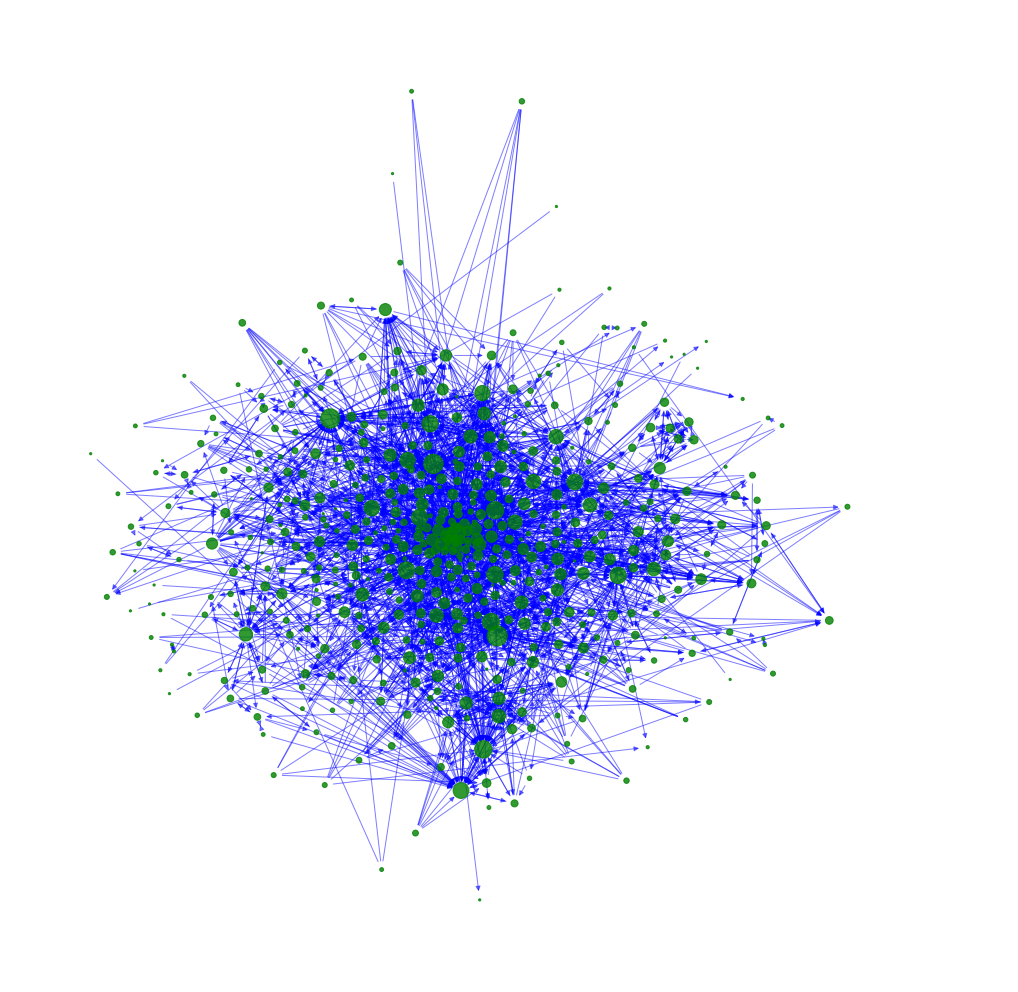

In [27]:
# Using force atlas configuration to achieve a pretty graph
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.5,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=1.0,
                        strongGravityMode=False,
                        gravity=40,

                        # Log
                        verbose=True)

plt.figure(figsize=(18,18)) 
positions = forceatlas2.forceatlas2_networkx_layout(DG, pos=None, iterations=2000)
nx.draw_networkx_nodes(DG, positions, node_size=[v*5 for v in list(d.values())], node_color=colors, alpha=0.8)
nx.draw_networkx_edges(DG, positions, edge_color=edge_colors, alpha=0.5)
plt.axis('off')
plt.show()

In [28]:
UG = DG.to_undirected()
d2 = dict(UG.degree)

100%|██████████| 2000/2000 [00:39<00:00, 50.39it/s]


BarnesHut Approximation  took  3.34  seconds
Repulsion forces  took  34.64  seconds
Gravitational forces  took  0.13  seconds
Attraction forces  took  0.31  seconds
AdjustSpeedAndApplyForces step  took  0.52  seconds


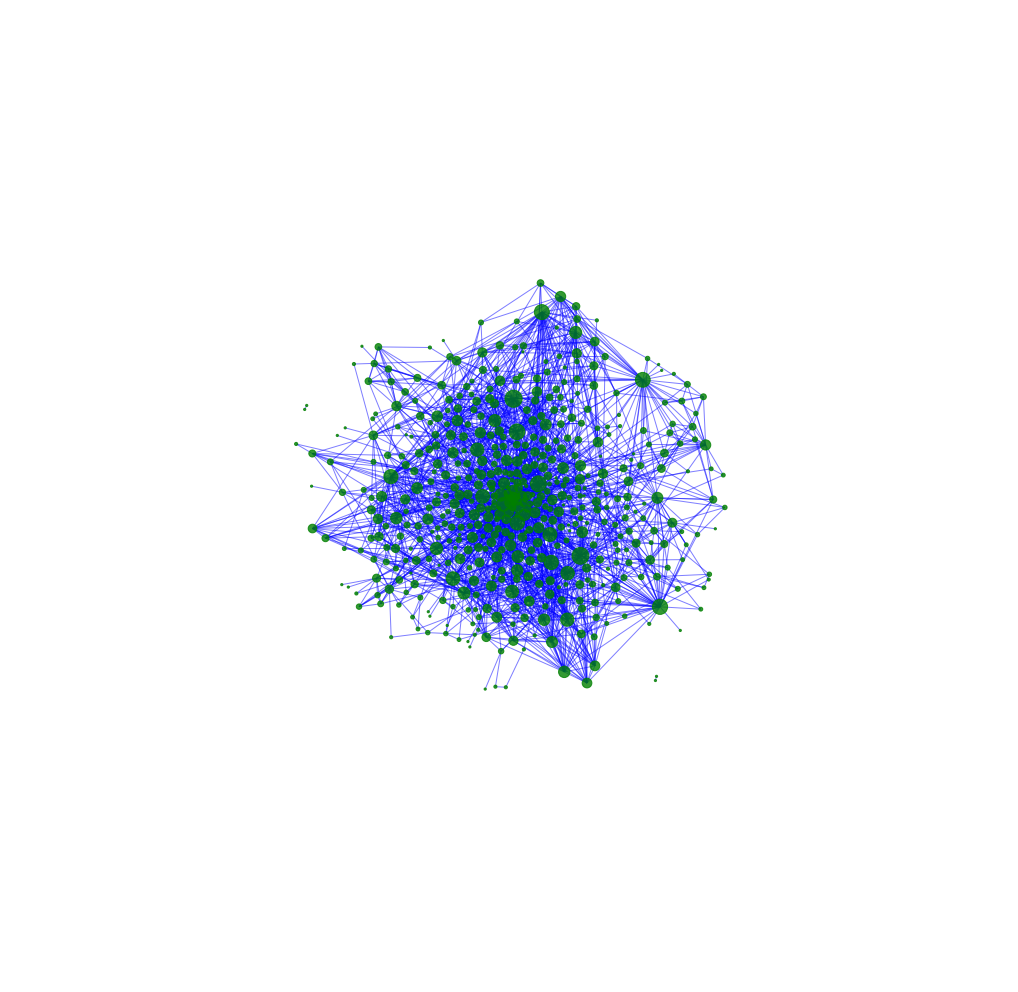

In [29]:
# Using force atlas configuration to achieve a pretty graph
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.5,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=1.0,
                        strongGravityMode=False,
                        gravity=40,

                        # Log
                        verbose=True)

plt.figure(figsize=(18,18)) 
positions = forceatlas2.forceatlas2_networkx_layout(UG, pos=None, iterations=2000)
nx.draw_networkx_nodes(UG, positions, node_size=[v*5 for v in list(d2.values())], node_color=colors, alpha=0.8)
nx.draw_networkx_edges(UG, positions, edge_color=edge_colors, alpha=0.5)
plt.axis('off')
plt.show()

In [30]:
len(UG.edges())

2554

In [31]:
# Top 5 most connected aesthetics in terms of in degree
sorted([
    {'name':x, 'value':DG.in_degree(x)} 
    for x,y in DG.nodes(data=True) 
], key=lambda k: k['value'],reverse=True)[0:20]

[{'name': 'Cottagecore', 'value': 57},
 {'name': 'Vaporwave', 'value': 55},
 {'name': 'Naturecore', 'value': 48},
 {'name': 'Vintage', 'value': 48},
 {'name': 'Dark Academia', 'value': 43},
 {'name': 'Cyberpunk', 'value': 42},
 {'name': 'Art Academia', 'value': 41},
 {'name': 'Pastel', 'value': 38},
 {'name': 'Goth', 'value': 37},
 {'name': 'Kidcore', 'value': 37},
 {'name': 'Grunge', 'value': 34},
 {'name': 'Lo-Fi', 'value': 33},
 {'name': 'Synthwave', 'value': 33},
 {'name': 'Punk', 'value': 31},
 {'name': 'Glowwave', 'value': 30},
 {'name': 'Animecore', 'value': 29},
 {'name': 'Light Academia', 'value': 29},
 {'name': 'Witchcore', 'value': 29},
 {'name': 'Baddie', 'value': 26},
 {'name': 'Goblincore', 'value': 26}]

In [32]:
#DG.in_edges('Cottagecore')

In [33]:
# Top 5 most connected aesthetics in terms of out degree
sorted([
    {'name':x, 'value':DG.out_degree(x)} 
    for x,y in DG.nodes(data=True) 
], key=lambda k: k['value'],reverse=True)[0:20]

[{'name': 'Milleniwave', 'value': 38},
 {'name': 'Cyberpunk', 'value': 33},
 {'name': 'Lo-Fi', 'value': 27},
 {'name': 'Witchcore', 'value': 25},
 {'name': 'Cottagecore', 'value': 24},
 {'name': 'Neo-Romanism', 'value': 24},
 {'name': 'Glowwave', 'value': 23},
 {'name': 'Rainbowcore', 'value': 21},
 {'name': 'Vaporwave', 'value': 21},
 {'name': 'Camp', 'value': 20},
 {'name': 'Dreamy', 'value': 20},
 {'name': 'Modernism', 'value': 20},
 {'name': 'Goth', 'value': 19},
 {'name': 'Grunge', 'value': 19},
 {'name': 'Nostalgiacore', 'value': 19},
 {'name': 'Bloomcore', 'value': 17},
 {'name': 'Cyberghetto', 'value': 17},
 {'name': 'Dark Academia', 'value': 17},
 {'name': 'Hot Topic', 'value': 17},
 {'name': 'Rainy Day', 'value': 17}]

In [34]:
# extraction of GCC and creation of the undirected version of the graph
largest_cc = max(nx.weakly_connected_components(DG), key=len)
DGCC = DG.subgraph(largest_cc)
UGCC = DGCC.to_undirected()

In [35]:
len(DGCC.nodes()), len(DGCC.edges())

(517, 3298)

In [36]:
len(UGCC.nodes()), len(UGCC.edges())

(517, 2552)

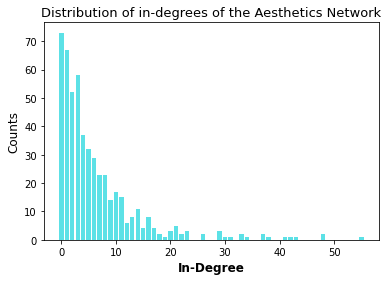

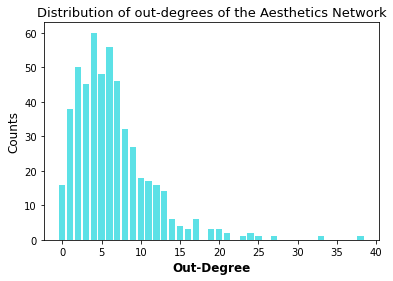

In [37]:
d_in=dict(DGCC.in_degree())
#Bar plot of the in-degree distribution
in_degrees=list(d_in.values())
v1 = np.arange(int(min(in_degrees)),int(max(in_degrees)))
count,bins=np.histogram(in_degrees,bins=v1)
plt.bar(bins[:-1], count,color='#5ce1e6')
plt.title('Distribution of in-degrees of the Aesthetics Network',fontsize=13)
plt.xlabel('In-Degree',fontsize=12,fontweight='bold')
plt.ylabel('Counts',fontsize=12)
plt.show() 

d_out=dict(DGCC.out_degree())
#Bar plot of the out-degree distribution
out_degrees=list(d_out.values())
v2 = np.arange(int(min(out_degrees)),int(max(out_degrees))+2)
count,bins=np.histogram(out_degrees,bins=v2)
plt.bar(bins[:-1], count,color='#5ce1e6')
plt.title('Distribution of out-degrees of the Aesthetics Network',fontsize=13)
plt.xlabel('Out-Degree',fontsize=12,fontweight='bold')
plt.ylabel('Counts',fontsize=12)
plt.show() 

In [38]:
baseurl = "https://aesthetics.fandom.com/api.php?"
action = "action=query"
content = "prop=extracts&exlimit=1&explaintext"
dataformat ="format=json"
tk = WordPunctTokenizer()

for file in DG:

    char_file = file.replace('/','_')
    title = "titles="+urllib.parse.quote_plus(file)
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')

    pag_val=re.findall(r'\d+',str(json.loads(wikitext)['query']['pages'].keys()))

    clean = json.loads(wikitext)['query']['pages'][pag_val[0]]['extract']
    clean = re.sub('=+.*?=+','',re.sub('=+ Gallery.*','', re.sub('\t','',re.sub('\n','', clean))))

    ftk = tk.tokenize(clean.lower())

    ftk =[ tok for tok in ftk if tok.isalpha()]
    if file == "Coffee House/Cafe":
        char_file='Coffee House_Cafe'
    with open('clean/'+f'{char_file}.txt', 'w',encoding="utf-8") as f:
        f.write(' '.join([str(item) for item in ftk]))
    

In [40]:
#without stopwords
from gensim.parsing.preprocessing import remove_stopwords
from nltk.corpus import stopwords

baseurl = "https://aesthetics.fandom.com/api.php?"
action = "action=query"
content = "prop=extracts&exlimit=1&explaintext"
dataformat ="format=json"
tk = WordPunctTokenizer()

for file in DG:
        char_file = file.replace('/','_')
        title = "titles="+urllib.parse.quote_plus(file)
        query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
        wikiresponse = urllib.request.urlopen(query)
        wikidata = wikiresponse.read()
        wikitext = wikidata.decode('utf-8')

        pag_val=re.findall(r'\d+',str(json.loads(wikitext)['query']['pages'].keys()))

        clean = json.loads(wikitext)['query']['pages'][pag_val[0]]['extract']
        clean = re.sub('=+.*?=+','',re.sub('=+ Gallery.*','', re.sub('\t','',re.sub('\n','', clean))))

        ftk = tk.tokenize(clean.lower())

        ftk =[ tok for tok in ftk if tok.isalpha()]

        ftk = [tok for tok in ftk if not tok in stopwords.words()]

        with open('cleaner/'+f'{char_file}.txt', 'w',encoding="utf-8") as f:
            f.write(' '.join([str(item) for item in ftk]))
    

### Summary

In [41]:
baseurl = "https://aesthetics.fandom.com/api.php?"
action = "action=query"
content = "prop=extracts&exlimit=1&explaintext"
dataformat ="format=json"
tk = WordPunctTokenizer()

for file in DG:
#     if file == "Mindcore":
#         continue
#     else:
    char_file = file.replace('/','_')
    title = "titles="+urllib.parse.quote_plus(file)
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')

    pag_val=re.findall(r'\d+',str(json.loads(wikitext)['query']['pages'].keys()))

    clean = json.loads(wikitext)['query']['pages'][pag_val[0]]['extract']
    clean = re.split('=+.*?=+',clean)
    clean = [re.sub('\n','', i) for i in clean[0]]


    clean = ''.join(map(str, clean))
    with open('text_analysis/'+f'{char_file}.txt', 'w',encoding="utf-8") as f:
        f.write(clean)

In [42]:
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx
 
def read_article(file_name):
    with open('text_analysis/'+f'{file_name}.txt', 'r',encoding="utf-8") as f:
        clean=f.read()
    article = clean.split(". ")
    sentences1 = []

    for sentence in article:
#         print(sentence)
        sentences1.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences1.pop() 
    
    for i in sentences1:
        if i == ['']:
            sentences1.remove(i)
            
    sentences=sentences1.copy()
    
    return sentences


In [43]:
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
    
    return 1 - cosine_distance(vector1, vector2)

In [44]:
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix

In [45]:
def generate_summary(file_name, top_n=2):
    stop_words = stopwords.words('english')
    summarize_text = []

    # Step 1 - Read text anc split it
    sentences =  read_article(file_name)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)
    
    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph,max_iter=500000)
    
    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
#     print("Indexes of top ranked_sentence order are ", ranked_sentence)   
    
    if len(ranked_sentence) < top_n:
        top_n=len(ranked_sentence)
    
    for i in range(top_n):
        summarize_text.append(" ".join(ranked_sentence[i][1]))
    
    return summarize_text
    # Step 5 - Offcourse, output the summarize texr
#     print("Summarize Text: \n", ". ".join(summarize_text))


In [46]:
for file in DG:
    char_file = file.replace('/','_')
    char_file = char_file.replace('/','_')
    print(char_file)
    if file in ["Horror"]:
        continue
    else:   
        txt_sum=generate_summary(char_file,2)
        txt_sum_final=""
        delimiter=". "
        txt_sum_final=delimiter.join(txt_sum)

        with open('text_sum/'+f'{char_file}.txt', 'w',encoding="utf-8") as f:
            f.write(txt_sum_final)
        

Abstract
Abstract Tech
Acid Pixie
Acidwave
Adventurecore
Afrofuturism
Afro-Victorian
After Hours
Agropeople
Alien
Alternative
Americana
American Pioneers
American Revolution
Androgynous
Anemoiacore
Angelcore
Anglocore
Anglo Gothic
Angura Kei
Animecore
Anti-Fashion
Applecore
Art Academia
Arts and Crafts Movement
Art Deco
Art Hoe
Art Nouveau
Artistiekelingen
Athlete
Atompunk
Auroracore
Autumn
Avant-garde
Babycore
Babygirl
Barbiecore
Bardcore
Baddie
Ballet Academia
Baroque
Bastardcore
Beatnik
Bibliopunk
Biker
Bills
Bimbo Casual
Biopunk
Bizarro Fiction
Blob Web
Bookstore Girl
Bloomcore
Bodikon
Bogan
Bohemian
Bombacore
Bosozoku
Boujee
Breakcore
Brocore
Bronzepunk
Britpop
Bubble Goth
Bubblegum Bitch
Bubblegum Witch
Bunnycore
Butterfly
Cabincore
Cagole
Camp
Campcore
Candycore
Caninecore
Carcore
Cargopunk
Carnivalcore
Cartelcore
Cartooncore
Casino
Cassette Futurism
Changelingcore
Chav
Cherry Emoji Twitter
Chic Modernist
Cholo
Christcore
Christian Girl Autumn
Christmas
Chaotic Academia
City Pop

In [47]:
stop_words = stopwords.words('english')
char_file='Horror'
top_n=2
summarize_text = []
with open('text_analysis/'+f'{char_file}.txt', 'r',encoding="utf-8") as f:
    clean=f.read()
    article = clean.split(".")
    sentences = []

    for sentence in article:
#         print(sentence)
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
#     sentences.pop() 
    
        
    for i in sentences:
        if i == ['']:
            sentences.remove(i)

# sentences=read_article(char_file)
sum_sentences=[]
sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)
sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
scores = nx.pagerank(sentence_similarity_graph,max_iter=600)
ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
sum_sentences.append(ranked_sentence[0][1])
sum_sentences.append(ranked_sentence[1][1])

# for i in range(top_n):
summarize_text.append(" ".join(sum_sentences[0]))
summarize_text.append(" ".join(sum_sentences[1]))
        
txt_sum_final=""
delimiter=". "
txt_sum_final=delimiter.join(summarize_text)

with open('text_sum/'+f'{char_file}.txt', 'w',encoding="utf-8") as f:
    f.write(txt_sum_final)

### LabMT and VADER

In [48]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from operator import itemgetter, attrgetter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import statistics
import matplotlib.pyplot as plt
import json

In [50]:
baseurl = "https://aesthetics.fandom.com/api.php?"
action = "action=query"
content = "prop=extracts&exlimit=1&explaintext"
dataformat ="format=json"
tk = WordPunctTokenizer()

for file in DG:
    char_file = file.replace('/','_')
    char_file = char_file.replace(' ','_')
    title = "titles="+urllib.parse.quote_plus(file)
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')

    pag_val=re.findall(r'\d+',str(json.loads(wikitext)['query']['pages'].keys()))

    clean = json.loads(wikitext)['query']['pages'][pag_val[0]]['extract']
    clean = re.split('=+.*?=+',clean)
    clean = [re.sub('\n','', i) for i in clean]
    clean = '.'.join(map(str, clean))
    with open('sentiment/'+f'{char_file}.txt', 'w',encoding="utf-8") as f:
        f.write(clean)

In [51]:
#loading labMT as a df
df_lab = pd.read_csv('labMT.csv',sep=';')
df_lab

,word,happiness_rank,happiness_average,happiness_standard_deviation,twitter_rank,google_rank,nyt_rank,lyrics_rank
0,laughter,1.0,8.50,0.9313,3600,--,--,1728
1,happiness,2.0,8.44,0.9723,1853,2458,--,1230
2,love,3.0,8.42,1.1082,25,317,328,23
3,happy,4.0,8.30,0.9949,65,1372,1313,375
4,laughed,5.0,8.26,1.1572,3334,3542,--,2332
...,...,...,...,...,...,...,...,...
10217,murder,10218.0,1.48,1.0150,2762,3110,1541,1059
10218,terrorism,10219.0,1.48,0.9089,--,--,3192,--
10219,rape,10220.0,1.44,0.7866,3133,--,4115,2977
10220,suicide,10221.0,1.30,0.8391,2124,4707,3319,2107


In [52]:
stop_words = list(set(stopwords.words('english')))
char_hap = []
char_vad=[]
lemmatizer = WordNetLemmatizer()

for file in DG:
    char_file=file.replace('/','_')
    char_file=char_file.replace(' ','_')
    text_words = []
    with open('sentiment/'+f'{char_file}.txt', 'r',encoding="utf-8") as f:
        clean=f.read()
        sent_text = nltk.sent_tokenize(clean)
        tokenized_text = nltk.word_tokenize(clean)

        for i in tokenized_text:
            if i in stop_words or not i.isalpha():
                tokenized_text.remove(i)
            else:
                text_words.append(lemmatizer.lemmatize(i.lower()))

#Calculating the LabMT score for each aesthetic 
    sent_avg = 0 
    count = 0
    for i in text_words:
        try:            
            if i in df_lab.word.to_list():
                sent_avg+=float(df_lab.loc[df_lab['word']==i]['happiness_average'].to_string(index=False))
                count+=1
        except:
            continue
    if count != 0:
        sent_avg/=count
        char_hap.append((char_file,sent_avg))
    else:
        char_hap.append((char_file,0))

#Calculating the Vader score for each aesthetic 
    analyzer = SentimentIntensityAnalyzer()
    sent_comp = 0 
    count = 0
    for i in sent_text:
        try:
            vs = analyzer.polarity_scores(i)
            sent_comp+=vs['compound']
            count+=1
        except:
            continue
    if count != 0:
        sent_comp/=count
        char_vad.append((char_file,sent_comp))
    else:
        char_vad.append((char_file,0))


In [53]:
char_vad2=sorted(char_vad, key=itemgetter(1),reverse=True)
happiest_char=char_vad2[0:10]

print("The 10 happiest aesthetics according to the VADER method are \n")
print(happiest_char)

The 10 happiest aesthetics according to the VADER method are 

[('Bunnycore', 0.906), ('Miami_Metro', 0.768), ('Lagenlook', 0.7191666666666667), ('Snowdrop', 0.6938749999999999), ('Romantic_Goth', 0.6900999999999999), ('Scrapbook', 0.6828714285714286), ('Ethereal', 0.6662250000000001), ('Nanopunk', 0.6649499999999999), ('Summer', 0.66422), ('Happycore', 0.6529166666666666)]


In [65]:
char_vad2=sorted(char_vad, key=itemgetter(1))
happiest_char=char_vad2[0:10]

print("The 10 saddest aesthetics according to the VADER method are \n")
print(happiest_char)

The 10 saddest aesthetics according to the VADER method are 

[('Nuclear', -0.5365333333333333), ('Cottagegore', -0.531075), ('Bastardcore', -0.51574), ('Horror', -0.48490333333333324), ('Yakuza', -0.4354), ('Hatecore', -0.41985), ('Yanki', -0.3938714285714286), ('Southern_Gothic', -0.39385000000000003), ('Anglo_Gothic', -0.3927714285714285), ('Postmodernism', -0.3902)]


In [54]:
char_hap2=sorted(char_hap, key=itemgetter(1),reverse=True)
happiest_char=char_hap2[0:10]

print("The 10 happiest aesthetics according to the LabMT method are \n")
print(happiest_char)

The 10 happiest aesthetics according to the LabMT method are 

[('Bookstore_Girl', 6.612), ('Glam_Girl', 6.411333333333334), ('Ukiyo-e', 6.369600000000002), ('Plant_Mom', 6.296349206349202), ('Lagenlook', 6.279545454545453), ('Spring', 6.257209302325583), ('Pixel_Cutie', 6.2496), ('Magenta', 6.2441666666666675), ('Romantic_Italian', 6.213731343283582), ('Fairy_Academia', 6.189600000000006)]


In [66]:
char_hap2=sorted(char_hap, key=itemgetter(1))
happiest_char=char_hap2[0:10]

print("The 10 saddest aesthetics according to the LabMT method are \n")
print(happiest_char)

The 10 saddest aesthetics according to the LabMT method are 

[('Nuclear', 5.050769230769231), ('Bogan', 5.0840000000000005), ('Stonepunk', 5.118823529411765), ('Cholo', 5.18119266055046), ('Pointillism', 5.235), ('Gorecore', 5.24648936170213), ('Hatecore', 5.248823529411766), ('Scuttlers', 5.336), ('Military', 5.33964010282776), ('Dark_Nymphet', 5.342)]


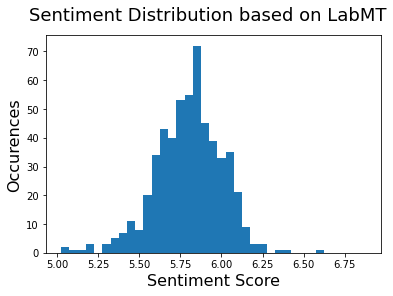

In [55]:
minimum=char_hap2[-1][1]
maximum=char_hap2[0][1]

char_labmt=[]

for i in range(len(char_hap)):
    char_labmt.append(char_hap[i][1])

b = np.array(np.arange(minimum,maximum+0.3,0.05))
hist,bins = np.histogram(char_labmt,b)
 
fig = plt.figure()
bar = plt.bar(b[:-1],hist,width=0.05)
fig.suptitle('Sentiment Distribution based on LabMT', fontsize=18)
plt.xlabel('Sentiment Score', fontsize=16)
plt.ylabel('Occurences', fontsize=16)
plt.show()

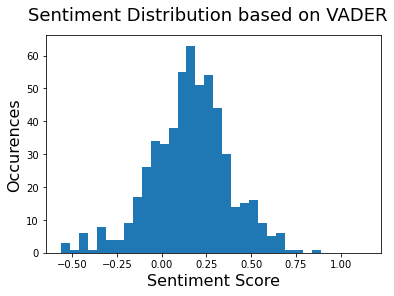

In [56]:
minimum=char_vad2[-1][1]
maximum=char_vad2[0][1]

char_vad3=[]

for i in range(len(char_vad)):
    char_vad3.append(char_vad[i][1])

b = np.array(np.arange(minimum,maximum+0.3,0.05))
hist,bins = np.histogram(char_vad3,b)
 
fig = plt.figure()
bar = plt.bar(b[:-1],hist,width=0.05)
fig.suptitle('Sentiment Distribution based on VADER', fontsize=18)
plt.xlabel('Sentiment Score', fontsize=16)
plt.ylabel('Occurences', fontsize=16)
plt.show()

In [57]:
# null_char=[]
# for i in char_hap:
#     if i[1]==0:
#         null_char.append(i[0])

In [ ]:
# null_char

In [ ]:
# ['Junkpunk', 'Natural Philosophy', 'Shā mǎ tè', 'Spy fiction', 'Woodland Goth']
# ['Salvagepunk','Green_Academia','Shamate','Spy_Fiction','Woodland_goth']

### Text Similarityes

In [58]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [60]:
similarities

[('2 Tone', 1),
 ('Emo', 8),
 ('Goth', 7),
 ('Goth', 7),
 ('Grunge', 7),
 ('Hippie', 1),
 ('Nanopunk', 6),
 ('Pastel Punk', 5),
 ('Steampunk', 13),
 ('Stonepunk', 7),
 ('Vintage', 9)]

In [67]:
import pandas as pd
import numpy as np

similarities_total={}
sim_total=[]
used_aest=[]
super_sim=[]
for file in DG:
    char_file=file.replace('/','_')
    char_file=char_file.replace(' ','_')
    similarities={}
    sim_list=[]
    with open ('sentiment/'+f'{char_file}.txt', 'r',encoding="utf-8") as f:
        my_text = f.read()

    for file1 in DG:
        if file1 == file or file1 in used_aest:
            continue
        else:
            char_file1=file1.replace('/','_')
            char_file1=char_file1.replace(' ','_')
            text_words = []
            with open('sentiment/'+f'{char_file1}.txt', 'r',encoding="utf-8") as f:
                sk_text = f.read()


            corpus = [my_text, sk_text]



            from sklearn.feature_extraction.text import TfidfVectorizer

            vectorizer = TfidfVectorizer()
            trsfm=vectorizer.fit_transform(corpus)
            pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['my_doc','sk_doc'])


            from sklearn.metrics.pairwise import cosine_similarity
            percentage_of_similarity=round(cosine_similarity(trsfm[0:1], trsfm)[0][1]*100)
            sim_list.append((file1,percentage_of_similarity))
            super_sim.append((file,file1,percentage_of_similarity))
            similarities[file1]=percentage_of_similarity
    sim_list.sort(key=lambda x:x[1], reverse=True)
    used_aest.append(file)
    similarities_total[file]=similarities
    sim_total.append((file,sim_list))
    
# Create a super list of all the edges and get the top 3000 something and put it into a graph to compare  
# Integrate the code, no downloads needed, just the file we already have
# Make the new graph and  share the code, have it done by tomorrow

In [109]:
sorted_by_second = sorted(super_sim, key=lambda tup: tup[2], reverse=True)
new_edges=sorted_by_second[:3301]

In [122]:
len(similarities_total.keys())

549

In [111]:
new_edges[1]

('Dark Academia', 'Waif', 89)

In [112]:
g_new = nx.DiGraph()
g_new.add_nodes_from(similarities_total.keys())

In [113]:
for i in new_edges:
    g_new.add_edge(i[0], i[1], weight=i[2])

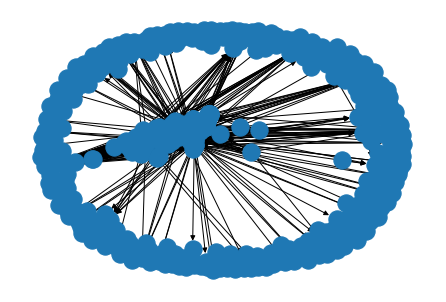

In [114]:
nx.draw(g_new)

In [115]:
# Defining node colors and edge colors
d = dict(g_new.degree)
#mapping = {"Enemy": '#D22B2B', "Boss": '#FFD700', "Ally": '#63D1F4'}
colors = ["Green"]
edge_colors = ['Blue']

100%|██████████| 2000/2000 [00:30<00:00, 64.60it/s]


BarnesHut Approximation  took  4.05  seconds
Repulsion forces  took  23.68  seconds
Gravitational forces  took  0.13  seconds
Attraction forces  took  1.58  seconds
AdjustSpeedAndApplyForces step  took  0.62  seconds


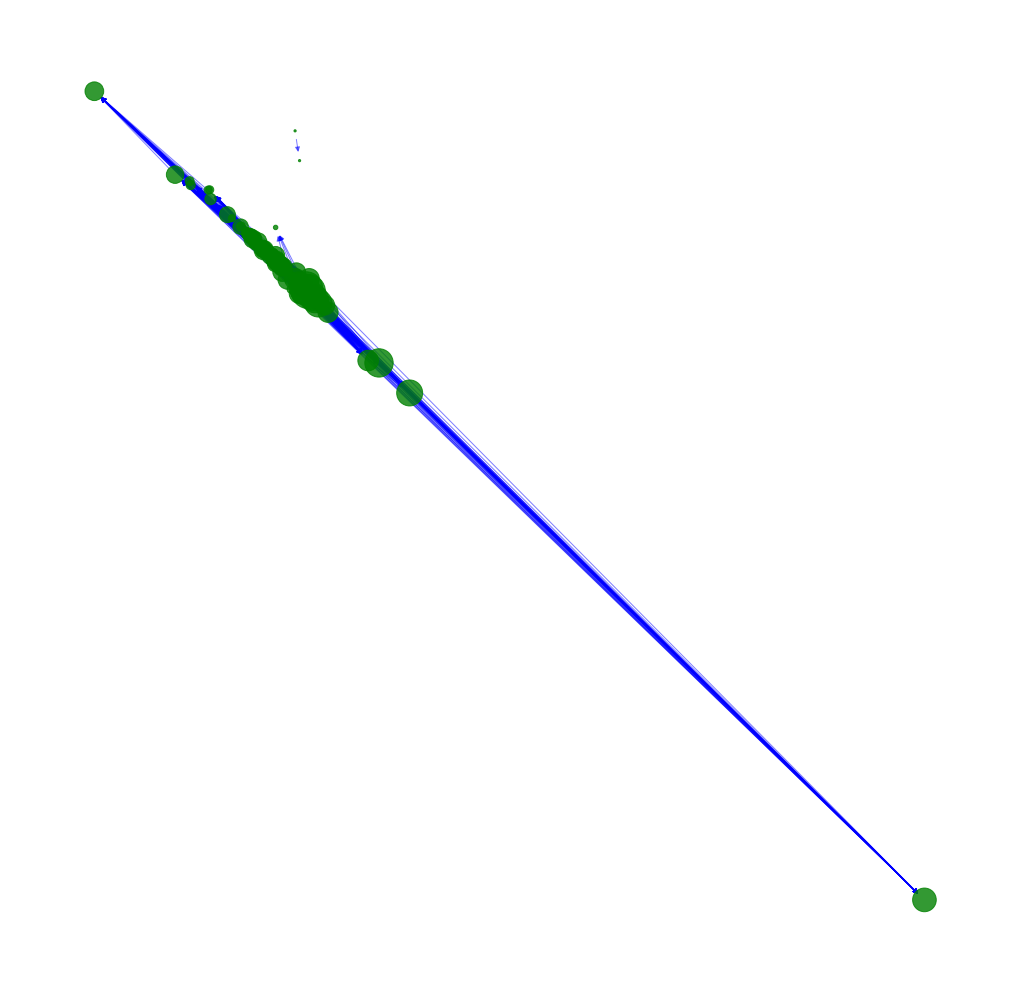

In [116]:
# Using force atlas configuration to achieve a pretty graph
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.5,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=1.0,
                        strongGravityMode=False,
                        gravity=40,

                        # Log
                        verbose=True)

plt.figure(figsize=(18,18)) 
positions = forceatlas2.forceatlas2_networkx_layout(g_new, pos=None, iterations=2000)
nx.draw_networkx_nodes(g_new, positions, node_size=[v*5 for v in list(d.values())], node_color=colors, alpha=0.8)
nx.draw_networkx_edges(g_new, positions, edge_color=edge_colors, alpha=0.5)
plt.axis('off')
plt.show()

In [117]:
sorted([
    {'name':x, 'value':g_new.in_degree(x)} 
    for x,y in g_new.nodes(data=True) 
], key=lambda k: k['value'],reverse=True)[0:20]

[{'name': 'Vaporwave', 'value': 150},
 {'name': 'Waif', 'value': 129},
 {'name': '1950s Suburbia', 'value': 112},
 {'name': 'Preppy', 'value': 101},
 {'name': 'Nymphet', 'value': 91},
 {'name': 'Milleniwave', 'value': 84},
 {'name': 'Trillwave', 'value': 80},
 {'name': 'Skinheads', 'value': 69},
 {'name': 'Y2K', 'value': 69},
 {'name': 'Southern Gothic', 'value': 62},
 {'name': 'Pop', 'value': 60},
 {'name': 'Roaring 20s', 'value': 60},
 {'name': 'Western', 'value': 59},
 {'name': 'Sloanies', 'value': 57},
 {'name': 'Synthwave', 'value': 55},
 {'name': 'Dark Academia', 'value': 52},
 {'name': 'Vintage Parisian', 'value': 47},
 {'name': 'Rollerwave', 'value': 43},
 {'name': 'Vampire', 'value': 43},
 {'name': 'Neo-Romanism', 'value': 42}]

In [118]:
# Top 5 most connected aesthetics in terms of out degree
sorted([
    {'name':x, 'value':g_new.out_degree(x)} 
    for x,y in g_new.nodes(data=True) 
], key=lambda k: k['value'],reverse=True)[0:20]

[{'name': 'Dark Academia', 'value': 181},
 {'name': 'Cottagecore', 'value': 178},
 {'name': 'Americana', 'value': 169},
 {'name': 'Bodikon', 'value': 105},
 {'name': 'Babygirl', 'value': 94},
 {'name': 'Afro-Victorian', 'value': 86},
 {'name': 'Afrofuturism', 'value': 83},
 {'name': 'Concore', 'value': 71},
 {'name': 'Golden Age of Detective Fiction', 'value': 68},
 {'name': 'Milleniwave', 'value': 66},
 {'name': 'American Pioneers', 'value': 65},
 {'name': 'Atompunk', 'value': 65},
 {'name': 'Heistcore', 'value': 56},
 {'name': 'Nymphet', 'value': 56},
 {'name': 'Fashwave', 'value': 55},
 {'name': 'Classicism', 'value': 52},
 {'name': 'Comiccore', 'value': 52},
 {'name': 'Fanfare', 'value': 48},
 {'name': 'Preppy', 'value': 48},
 {'name': 'Breakcore', 'value': 45}]

In [119]:
# extraction of GCC and creation of the undirected version of the graph
largest_cc = max(nx.weakly_connected_components(g_new), key=len)
DGCC = g_new.subgraph(largest_cc)
UGCC = DGCC.to_undirected()

In [120]:
len(DGCC.nodes()), len(DGCC.edges())

(266, 3300)

In [121]:
len(UGCC.nodes()), len(UGCC.edges())

(266, 3300)

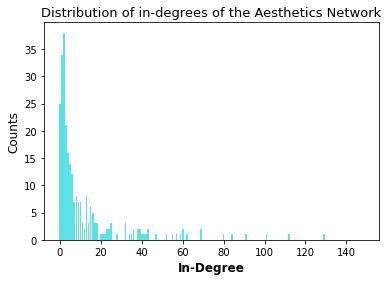

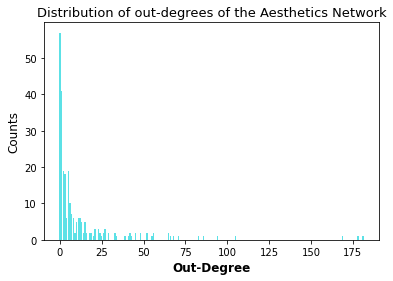

In [123]:
d_in=dict(DGCC.in_degree())
#Bar plot of the in-degree distribution
in_degrees=list(d_in.values())
v1 = np.arange(int(min(in_degrees)),int(max(in_degrees)))
count,bins=np.histogram(in_degrees,bins=v1)
plt.bar(bins[:-1], count,color='#5ce1e6')
plt.title('Distribution of in-degrees of the Aesthetics Network',fontsize=13)
plt.xlabel('In-Degree',fontsize=12,fontweight='bold')
plt.ylabel('Counts',fontsize=12)
plt.show() 

d_out=dict(DGCC.out_degree())
#Bar plot of the out-degree distribution
out_degrees=list(d_out.values())
v2 = np.arange(int(min(out_degrees)),int(max(out_degrees))+2)
count,bins=np.histogram(out_degrees,bins=v2)
plt.bar(bins[:-1], count,color='#5ce1e6')
plt.title('Distribution of out-degrees of the Aesthetics Network',fontsize=13)
plt.xlabel('Out-Degree',fontsize=12,fontweight='bold')
plt.ylabel('Counts',fontsize=12)
plt.show() 

In [72]:
g = nx.Graph()
g.add_nodes_from(similarities_total.keys())

In [63]:
weights=[]
for i in new_edges:
    for k, v in similarities_total[i].items():
        g.add_edge(i, k, weight=v)
        weights.append(v)

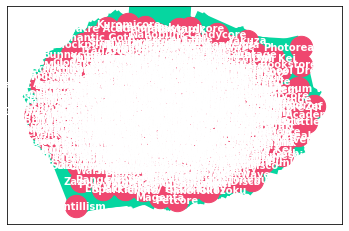

In [64]:


pos = nx.spring_layout(g, k=0.9)
nx.draw_networkx_edges(g, pos, edge_color='#06D6A0', arrowsize=22, width=weights)
nx.draw_networkx_nodes(g, pos,node_color='#EF476F', node_size=500)
nx.draw_networkx_labels(g, pos, font_size=10, font_weight='bold', font_color='white')
plt.gca().margins(0.1, 0.1)
plt.show()